## CS 237 Homework 01 -- Data Display in Python

### Due Thursday at 11:59 PM in Gradescope (with grace period of 6 hours)

In this first homework, you will become familiar with various methods of displaying the results of probability experiments graphically in Python using Jupyter notebooks and Matplotlib. This will be a fundamental way of understand the results of experiments throughout the course. We will cover:

  - Basic introduction to Python and Jupyter Notebook.
  - Basic introduction to Matplotlib and graphing
  - Basic introduction to Monte Carlo (probability) simulation. 

Please follow the <a href="http://www.cs.bu.edu/fac/snyder/cs237/HWSubmissionInstructions.html">HW Submission Instructions</a>; any homeworks not following these requirements may be penalized. 

# Anaconda Distribution of Python 
- Download from https://www.continuum.io/downloads
    - Make sure it's Python 3! 
    - Be sure to pick the correct Operating System (i.e., Windows, MAC OS, Linux)

# Starting Jupyter 
- Open a Terminal Window 
    - For MAC OS, open your Applications folder, then open the Utilities folder. Open the Terminal application. (Or, type "terminal" into Spotlight.) You may want to add this to your dock.
    - For Windows, simply search for CMD and run the result
- In the terminal run $\texttt{jupyter notebook}$
- This will bring you to the home page. 
- Click new and then click python3 to create a new Ipython3 notebook.
    - Alternatively, use the Anaconda Navigator that will be installed in your Applications folder.  


In [9]:
# Here are some imports which will be used in the code in the rest of the lab  

# Imports used for the code in CS 237

import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting
import seaborn as sns             # Fancy plotting 
import pandas as pd               # Data input and manipulation

from numpy.random import seed, randint, random
from collections import Counter

%matplotlib inline


# Plotting Points

The <code>scatter(...)</code> function is used to plot points from a list of x values and the associated y values. 


This is the list of points: [(1, 2), (2, 3), (3, 6), (4, 8)]
They must be input to the function as separate lists:
	X = [1, 2, 3, 4]
	Y = [2, 3, 6, 8] 



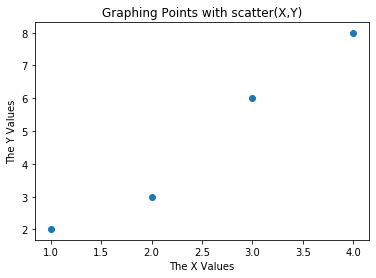

In [10]:
# To plot the points (1,2), (2,3), (3,6), (4,8) we would list the x values and the corresponding y values:
X = [1,2,3,4]
Y = [2,3,6,8]

print("\nThis is the list of points:",list(zip(X,Y)))
print("They must be input to the function as separate lists:")
print("\tX =",X)
print("\tY =",Y,"\n")
plt.scatter(X,Y)
plt.title('Graphing Points with scatter(X,Y)')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()



# Plotting Lines and Curves

If you call <code>plot(...)</code> instead of <code>scatter(...)</code> you will display a curve created by connecting the points with straight lines. Essentially you can only plot straight lines between points, but if the points are close together, you will not notice, and it will look like a smooth curve. 

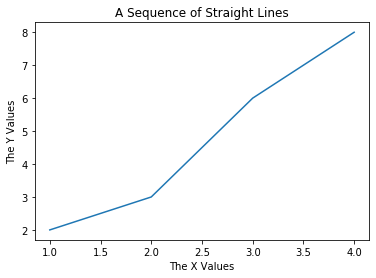

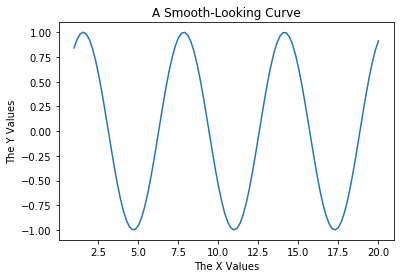

In [11]:
# To plot a curve through the points (1,2), (2,3), (3,6), (4,8) we would use: 
plt.plot([1,2,3,4], [2,3,6,8])
plt.title('A Sequence of Straight Lines')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

X = np.linspace(1,20,100)            # returns a list of 100 equally-spaced values in the range [1..20]
Y = [np.sin(x) for x in X]
plt.plot(X,Y)
plt.title('A Smooth-Looking Curve')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

If you want to do both, you can simply call both functions before you call show(). 

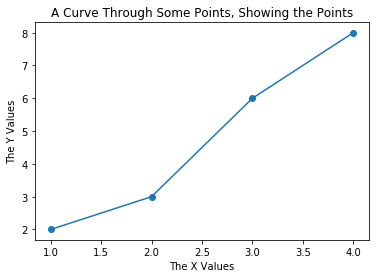

In [12]:
plt.scatter([1,2,3,4], [2,3,6,8])
plt.plot([1,2,3,4], [2,3,6,8])
plt.title('A Curve Through Some Points, Showing the Points')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

If you want to draw a single line from $(x_1,y_1)$ to $(x_2,y_2)$ you can plot $[x_1,x_2]$ and $[y_1,y_2].$

Here we have added a zero line to our sin curve:

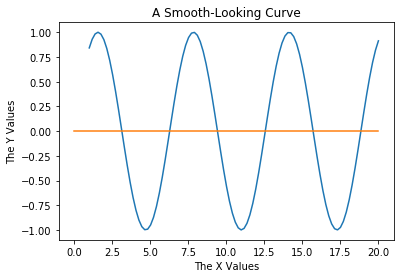

In [13]:
X = np.linspace(1,20,100)            # returns a list of 100 equally-spaced values in the range [1..20]
Y = [np.sin(x) for x in X]
plt.plot(X,Y)
plt.plot([0,20],[0,0])
plt.title('A Smooth-Looking Curve')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

### For further details on drawing plots, particularly on color and format, see the Appendix at the end of this document

# Problem Zero: Using the Numpy Random Library

We have imported a number of functions from the Numpy Random library, which you can read 
about <a href="https://docs.scipy.org/doc/numpy/user/quickstart.html">here</a>. 

In [14]:
# Run this cell several times and and see what happens

random()

0.8886942201245901

In [15]:
# Run this cell several times and and see what happens
# List comprehensions are your best friend, learn how to use them!!!

size = 10
rands = [ random() for k in range(size) ]
rands

[0.6934575641572092,
 0.7283100288407065,
 0.4996770510212959,
 0.006990390574391658,
 0.11158699430364005,
 0.7399549823996346,
 0.03642062974938265,
 0.45912945390808524,
 0.2563775101380261,
 0.46860235141546014]

In [16]:
# Run this cell several times and and see what happens
# This produces a Numpy 1D vector, which is
# another way to store a sequence.

size = 5
random(size)

array([0.10334605, 0.90732697, 0.28830884, 0.79120941, 0.75657341])

In [17]:
# In most cases, arrays are interchangeable with lists, but if you need a Python 
# list, just do this:

list(random(size))

[0.18714022543432351,
 0.01759414441867424,
 0.2842580724500646,
 0.9119269363326965,
 0.5321362836967898]

In order to make grading easier, we will "seed" the random number generation so that it always produces the same pseudo-random sequence. However, you should generally try running your code several times without the seed, trying it on various random sequences. 

Just be sure to include the seed before running your program to submit, so that the graders can see your correct results. 


In [18]:
# Run this cell several times, and see what happens
# How is it different from the result in cell [210]?

seed(0)
random(5)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ])

# Problem 1 (Plotting Points)

## Part A

One of our standard examples in lecture will be a "spinner" which can be set in motion to
randomly chose a real number in the half-open interval [0..1): 

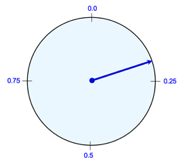


We will simulate this using the Python function <code>random()</code> from the Numpy.random library we imported above.


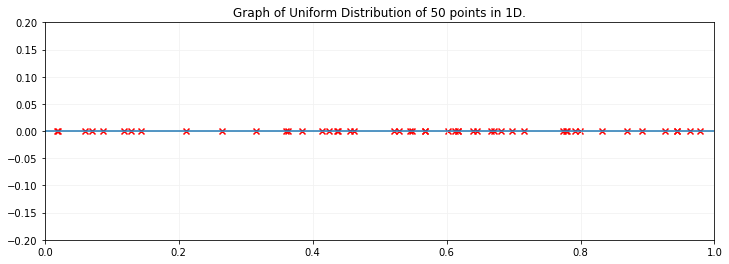

In [19]:
#     Use numpy's random() function to build a list of x_vals with the following properties: 
#          - x_vals list should have length num_trials
#          - Each value in x_vals should be a random float in the range [0..1)
#     Now plot the points (xi,0) along the x axis in the diagram below


def random_line_plot(num_trials):
    x_vals =  [ list(random(num_trials)) ]                        # <---  Your code here
    y_vals =  [ 0 for k in range(num_trials)  ]             # <---  Your code here
    plt.figure(figsize=(12, 4))
    plt.title('Graph of Uniform Distribution of '+str(num_trials)+' points in 1D.',fontsize=12)
    plt.grid(color='0.95')
    plt.ylim(-0.2, 0.2)
    plt.xlim(-0.0,1.0)
    plt.plot([0,1.0],[0,0])
    plt.scatter(x_vals, y_vals, marker="x",color="r")
    plt.show()

# TO DO:  Complete the lines of code indicated above. Then comment out the seed(0) 
# statement and run this cell several times to see the distribution of points;
# put the seed command back in before you submit!

seed(0)
random_line_plot(50)

## Part B

Now we will simulate the experiment of throwing a dart at a unit square, which will produce a scatter plot of random points in a 2D grid. 



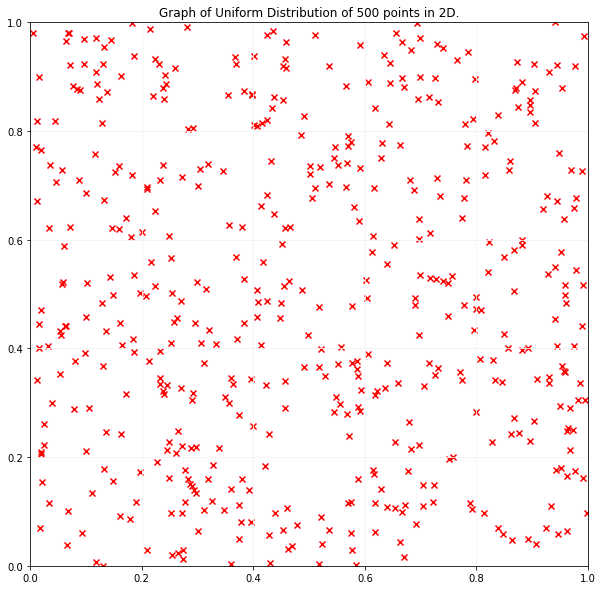

In [20]:
# TO DO:  Complete the following function stub which will produce a scatter plot of 
#         random points in a unit square. 

def random_plane_plot(num_trials):
    """Uses numpy's random function to build a list of x and y values with the following properties: 
    - x_vals should have len num_trials
    - y_vals should have len num_trials
    - Each value in x and y should be between 0 and 1 
    HINT: use the same code to build x_vals and y_vals
    """
    x_vals = [ list(random(num_trials)) ]              # <---  Your code here
    y_vals = [ list(random(num_trials)) ]              # <---  Your code here
    plt.figure(num=None, figsize=(10, 10))
    plt.title('Graph of Uniform Distribution of '+str(num_trials)+' points in 2D.',fontsize=12)
    plt.grid(color='0.95')
    plt.ylim(0, 1)
    plt.xlim(0,1)
    plt.scatter(x_vals, y_vals,marker="x",color="r")
    plt.show()

    
# Comment out the next line and run this cell several times to see the distribution of points;
# put the seed command back in before you submit!

seed(0)
random_plane_plot(500)

### [End of Problem One]

# Bar Charts

If we do the exact same thing as we did with a simple plot, but use the function <code>bar(...)</code> we get a bar chart:

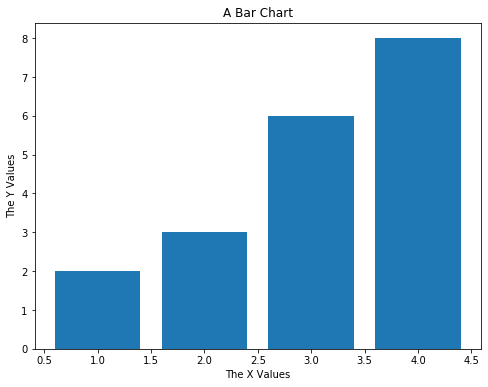

In [21]:
# To plot the points (1,2), (2,3), (3,6), (4,8) we would list the x values and the corresponding y values:
plt.figure(num=None, figsize=(8, 6))
plt.bar([1,2,3,4], [2,3,6,8])
plt.title('A Bar Chart')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()

If the Y axis is probabilities (in the range 0 .. 1), we get a distribution of the probabilities among the outcomes of an experiment:

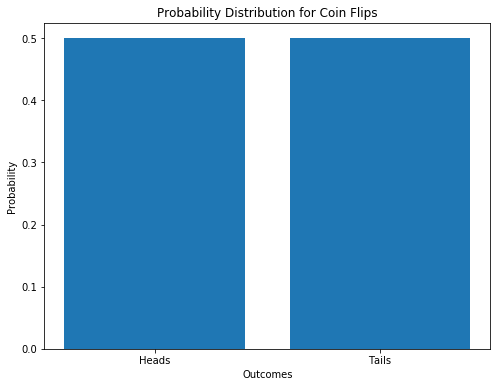

In [22]:
# Show the distribution of probabilities for a coin flip:
x = [0,1]
y = [0.5, 0.5]
labels = ['Heads', 'Tails']

plt.figure(num=None, figsize=(8, 6))
plt.xticks(x, labels)
plt.bar(x,y)
plt.title('Probability Distribution for Coin Flips')
plt.ylabel("Probability")
plt.xlabel("Outcomes")
plt.show()

With a few tweaks, you can create an attractive bar chart for arbitrary probability distributions (we will cover the topic of distributions in a few weeks). 

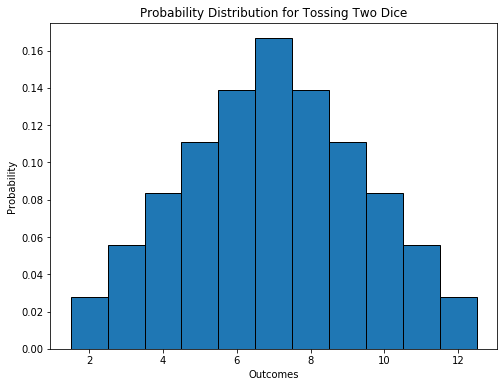

In [23]:
# Show the distribution of probabilities for flipping two dice
# We will consider this example in lecture

x = [k for k in range(2,13)]
y = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]

plt.figure(num=None, figsize=(8, 6))
plt.bar(x,y, width=1.0,edgecolor='black')    # <--- Note how we set the width and edge color
plt.title('Probability Distribution for Tossing Two Dice')
plt.ylabel("Probability")
plt.xlabel("Outcomes")
plt.show()

# Histograms
- If you give a list of values to <code>hist(...)</code> it will create a histogram counting how many of each value occur; this list can be unordered;
- You will get a cleaner display if you specify where the edges of the bins are, and make sure the edges of the bins are visible, as shown in this example:

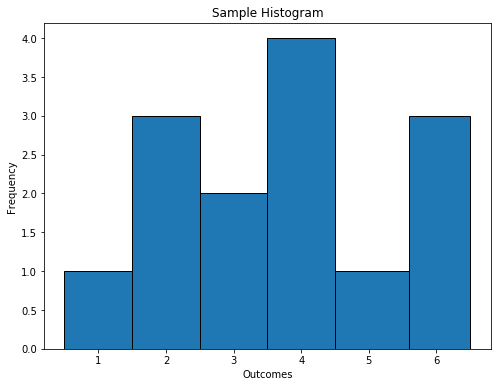

In [24]:
plt.figure(num=None, figsize=(8, 6))

plt.hist([1,2,4,2,6,2,4,5,6,4,6,3,4,3],bins=[0.5,1.5,2.5,3.5,4.5,5.6,6.5],edgecolor='black')
plt.title('Sample Histogram')
plt.xlabel("Outcomes")
plt.ylabel("Frequency")
plt.show()

# Problem 2 
Read and understand the function <code>role_die(...)</code> below, which simulates the experiment of rolling a fair, six-sided die <code>num_trials</code> times. Note carefully:
- The sample space is $\{1,2,3,4,5,6\}$. 
- The experiment is equi-probable, i.e., the probability of any particular outcome is $\frac{1}{6}$.
- If we record the outcome for a large number of experiments, we would expect the number of outcomes to be "evenly distributed." In other words, for a large number of trials, we would expect the probability of each outcome $k\in \{1,2,3,4,5,6\}$ to be

$$\frac{\text{number of times we observed a value } k}{\texttt{num_trials}} \approx \frac{1}{6}$$ 

TO DO: For this first problem, simply provide the Python code which would display a <b>histogram</b> of the results of the experiment for 100,000 trials with appropriate labels.  You should use the Numpy function <code>randint(...)</code>, as shown in the next cell.

In [25]:
# Demo of randint(lo,hi), which generates a random integer from the sequence
# [lo,lo+1,...,hi-1].  

# In other words the upper bound is exclusive, to be consistent with the indices in lists,
# the Python range function, and so on. 

randint(0,4)

1

In [26]:
# You can also ask it for an array, since it is a Numpy function:

randint(0,4,10)

array([1, 2, 0, 2, 1, 0, 0, 0, 3, 2])

In [27]:
seed(0)

def roll_die(num_trials = 100000):         #  <-- note the use of the default parameter value
    trials_and_results = randint(1,7,num_trials) # this creates a 1D array of length num_trials of random integers 1..6
    return trials_and_results

example_trials = roll_die()  # <-- now we don't have to specify unless different

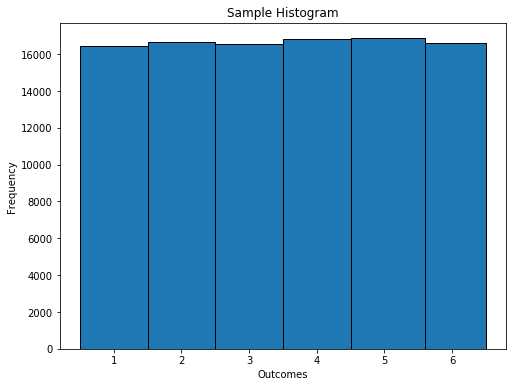

In [28]:
plt.figure(num=None, figsize=(8, 6))
plt.hist(example_trials, bins=[0.5,1.5,2.5,3.5,4.5,5.6,6.5],edgecolor='black')
plt.title('Sample Histogram')
plt.xlabel("Outcomes")
plt.ylabel("Frequency")
plt.show()

# Problem 3 

Now we will display the same results showing the distribution of probabilities, instead of an explicit histogram; since the experiment is equi-probable,
if we record the outcome for a large number of experiments, we would expect the number of outcomes to be "evenly distributed." In other words, for a large number of trials, we would expect the probability of each outcome $k\in \{1,2,3,4,5,6\}$ to be

$$\frac{\text{number of times we observed a value } k}{\texttt{num_trials}} \approx \frac{1}{6}$$
- To calculate the probabilities, you will need to count the number of occurrences of each of the outcomes, you may find the function <code>Counter(...)</code> useful for this (Google "Numpy Counter" to find out how this works); 
- Once you have the frequency of each outcome, divide by the total number of trials to get the probability for each.

TO DO:  Complete the function stub below which takes the list returned by <code>roll_die(...)</code>, or any other experiment returning numerical results, and produces a frequency distribution; this should have the same shape as the histogram, but the Y axis will be probabilities instead of the frequency. Again, create appropriate labels. Demonstrate your function, again, on the list <code>example_trials</code> produced in Problem 1. 

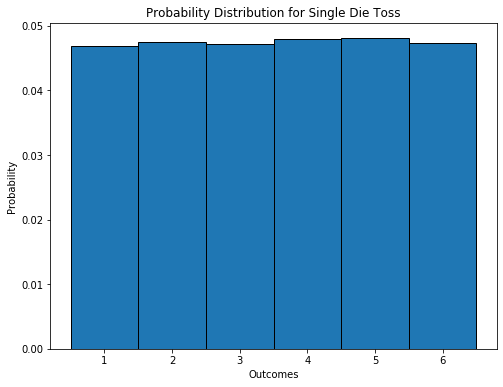

In [31]:
# Solution

seed(0)
 
def show_distribution(outcomes, title='Probability Distribution'):
    x = outcomes
    f = Counter(x)
    g = sum(outcomes)
    z = range (min(outcomes),max(outcomes)+1)
    l = [f[k]/g for k in z] #outcomes.tolist()
    y = l
    
    plt.figure(num=None, figsize=(8, 6))
    plt.bar(z,y, width=1.0,edgecolor='black')    # <--- Note how we set the width and edge color
    plt.title(title)
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    plt.show()
    
show_distribution(example_trials,title='Probability Distribution for Single Die Toss')  

# Motivation for Monte Carlo Simulation

For the case of a fair die, the distribution is very easily computed by hand. But in general, it may be difficult to write down an analytical solution for the distribution produced by a random experiment. This is where simulation comes into play: instead of  mathematically computing the distribution explicitly, you can use this method of repeating experiments, and recording outcomes to understand the probabilistic rules governing some real world event. When you can come up with an analytical result, this is a nice way of confirming its correctness!

# Problem 4
You will now do the same thing you did in the previous problems, but with a new experiment: instead of rolling one die and recording the value, you will simulate rolling $n$ dies and recording their sum. For example, if $n=2$ and  the first die shows up as a 3, and the second die shows up as a 1, the sum (and the value we record) would be 4. 

TO DO:  Complete the two function stubs below and then demonstrate by providing code which would print out the probability distribution for rolling 2 dice 100,000 times. 

Hint: Not required, but think about how you might do this in one line using Numpy and list comprehensions. 

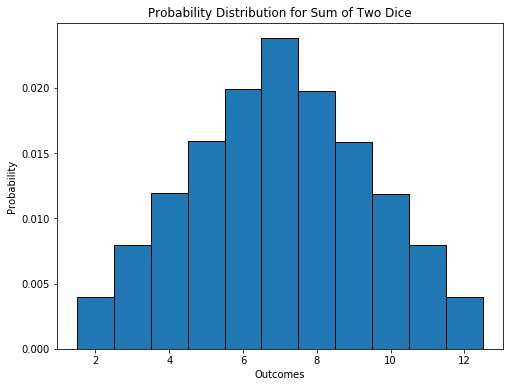

In [154]:
# Solution

seed(0)
    
def roll_and_add_dice(num_dice, num_trials = 10**6):
    '''x = example_trials
    f = Counter(x)
    l = [f[k]/sum(example_trials.tolist()) for k in range(1,7)]
    print(l)
    z = example_trials
    c = Counter(z)
    b = [f[k]/sum(example_trials.tolist()) for k in range(1,7)]
    print(b)
    '''
    #print('here;')
    total = 0
    results = []
    for i in range(num_trials):
        total = sum([ randint(1,7) for k in range(num_dice) ])
        results.append(total)
    #print(results)
    return results
    
'''plt.figure(num=None, figsize=(8, 6))
plt.hist(example_trials, bins=[0.5,1.5,2.5,3.5,4.5,5.6,6.5],edgecolor='black')
plt.title('Sample Histogram')
plt.xlabel("Outcomes")
plt.ylabel("Frequency")
plt.show()'''
    
    
    
show_distribution(roll_and_add_dice(2),title='Probability Distribution for Sum of Two Dice')

# Problem 5 (Monte Carlo Calculation of $\pi$)

This final problem is also a Monte Carlo simulation, but this time in
the continuous domain: we will calculate the value of $\pi$ using
a variation of Problem 1B. 

We will leave this one up to you as it the exact details, but you must
use the following fact: a circle inscribed in a unit square (i.e., with
side of length and area 1.0):

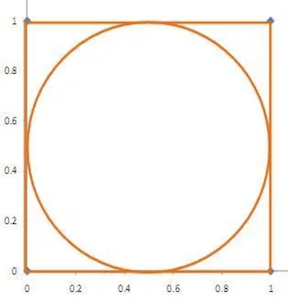

has as radius of 0.5 and an area of $\pi\ast (0.5^2) = \frac{\pi}{4}.$

Therefore, if you generate <code>num_trials</code> random points in the unit square, as in Problem 1B,
and count how many land inside the circle, you can calculate an approximation of $\pi$. 

For this problem, you must
<blockquote>

  (A)  Draw the diagram of the unit square with inscribed circle and 500 random points, and calculate the value of $\pi$. 
  
  (B) Without drawing the diagram, calculate the value of $\pi$ you would get
    from $10^5$ trials. 
    
  (C) After completing (B), try to get a more accurate value for $\pi$ by increasing the number of trials. Your results will depend on your machine, but for comparison, with my new Macbook Pro, I ran it with $10^8$ trials while I got a cup of coffee, and it had the answer correct to 3 decimal places when I came back. Sometimes I run big experiments overnight! 
The key here is to try increasingly large numbers and see how the time increases. 
  
</blockquote>    
Hint: Start by copying your code from Problem 1B. You might find Mr. Pythagoras's formula useful.  

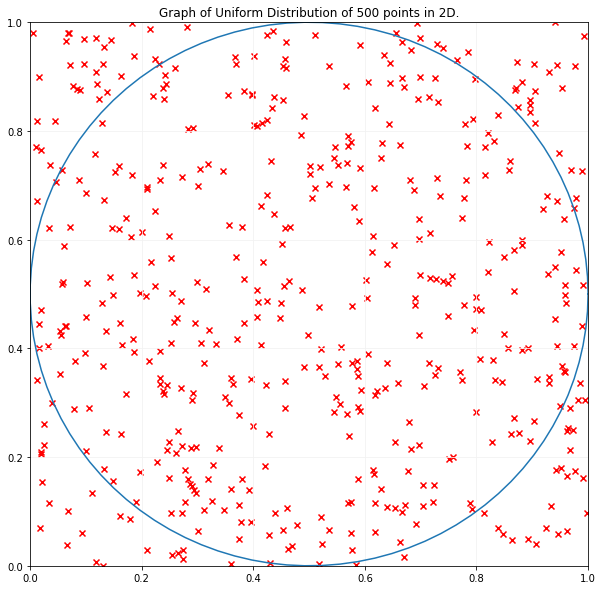

In [155]:
# (A)
def random_plane_plot(num_trials):
    """Uses numpy's random function to build a list of x and y values with the following properties: 
    - x_vals should have len num_trials
    - y_vals should have len num_trials
    - Each value in x and y should be between 0 and 1 
    HINT: use the same code to build x_vals and y_vals
    """
    x_vals = [ list(random(num_trials)) ]              # <---  Your code here
    y_vals = [ list(random(num_trials)) ]              # <---  Your code here
    plt.figure(num=None, figsize=(10, 10))
    plt.title('Graph of Uniform Distribution of '+str(num_trials)+' points in 2D.',fontsize=12)
    plt.grid(color='0.95')
    plt.ylim(0, 1)
    plt.xlim(0,1)
    plt.scatter(x_vals, y_vals,marker="x",color="r")
    n = np.linspace(0, 2 * np.pi, 100)
    plt.plot(0.5 * np.cos(n)+0.5, 0.5 * np.sin(n)+0.5)
    plt.show()
    


    
# Comment out the next line and run this cell several times to see the distribution of points;
# put the seed command back in before you submit!

seed(0)
random_plane_plot(500)





























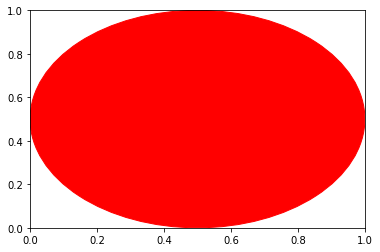

In [156]:
# (B)
'''
X = np.linspace(1,20,100)            # returns a list of 100 equally-spaced values in the range [1..20]
Y = [np.sin(x) for x in X]
plt.plot(X,Y)
plt.plot([0,20],[0,0])
plt.title('A Smooth-Looking Curve')
plt.xlabel("The X Values")
plt.ylabel("The Y Values")
plt.show()
th = 0
h = 0.5
k = 0.5
    #step = 2*Math.PI/20
r = 0.5
x = h + ( r * np.cos(th))
y = k + ( r * np.sin(th))
    #print(x)
    #print(y)
    '''
circle = plt.Circle((0.5,0.5),.5,color='r')
plt.gcf().gca().add_artist(circle)



In [157]:
# (C)



# Appendix: Customizing Your Plots

One thing you have probably noticed is that when you write "bare-bones" code such as we have above, certain
defaults are used for the size and layout of the figure and the style of the drawing. One of the most noticable is that when you draw multiple lines, Matplotlib will change the color each time you call the same function (notice that this doesn't happen when calling a different function, e.g., plot followed by scatter). 

## Using Colors

Matplotlib cycles through a sequence of 10 colors, which is fine if that is what you want. For my taste, they are pretty ugly, and in the next section we will show you how to use the colors you want. 



The 10 Matplotlib color sequence, starting at 12 o'clock and going clockwise:


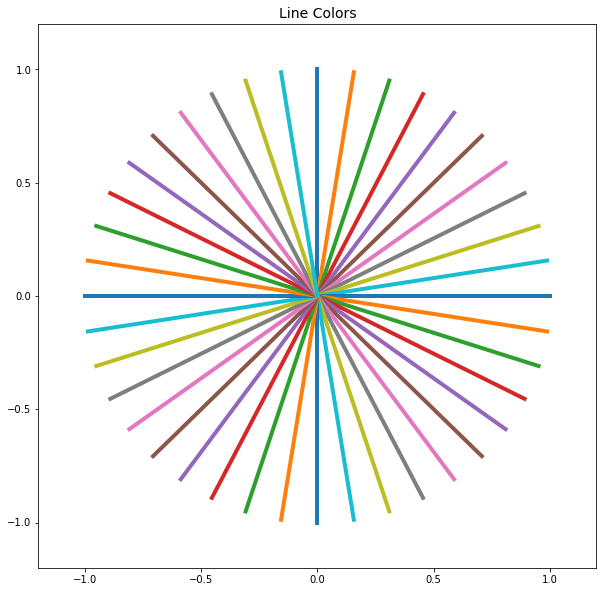

In [158]:
print("\nThe 10 Matplotlib color sequence, starting at 12 o\'clock and going clockwise:")

plt.figure(figsize=(10,10))
for k in np.arange(0,2*np.pi,np.pi/20):                 # arange is like range, except it allows you to use floats
    plt.plot([0,np.sin(k)],[0,np.cos(k)],lw=4)
plt.title('Line Colors',fontsize=14)
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.show()

Here is an example where we simply change the colors of the plot using the appropriate parameter; see a complete list of colors here: https://matplotlib.org/2.0.2/api/colors_api.html

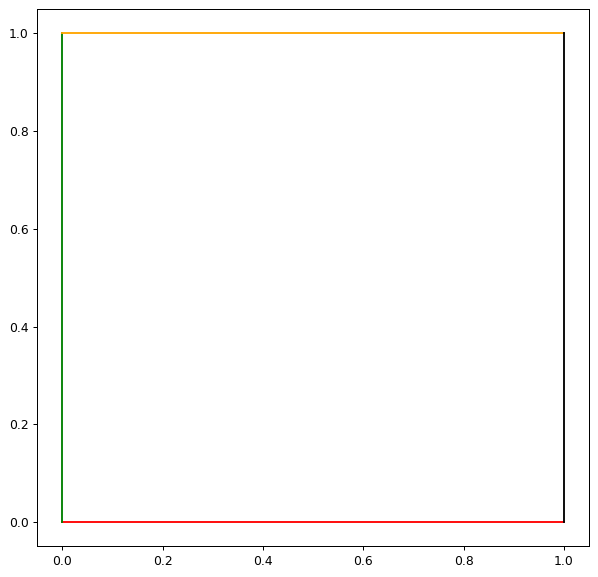

In [159]:
# EXAMPLE: Plotting a square with lines of different colors
plt.figure(num=None, figsize=(8, 8), dpi=89)
plt.plot([0,1],[0,0],color='red') # Line connecting (0,0) to (1,0)
plt.plot([0,0],[0,1],color='green') # Line connecting (0,0) to (0,1)
plt.plot([0,1],[1,1],color='orange') # Line connecting (0,1) to (1,1)
plt.plot([1,1],[0,1],color='black') # Line connecting (1,0) to (1,1)

## Changing the Style of Plots

Here is an example showing how to

  - change the size of the whole figure
  - change the color of lines or points
  - change the style of lines or points
  
To see a complete list of lines styles see:  https://matplotlib.org/2.0.2/api/lines_api.html

To see a complete list of colors see: https://matplotlib.org/2.0.2/api/colors_api.html

To see a complete list of marker (point) styles see:  https://matplotlib.org/2.0.2/api/markers_api.html#module-matplotlib.markers

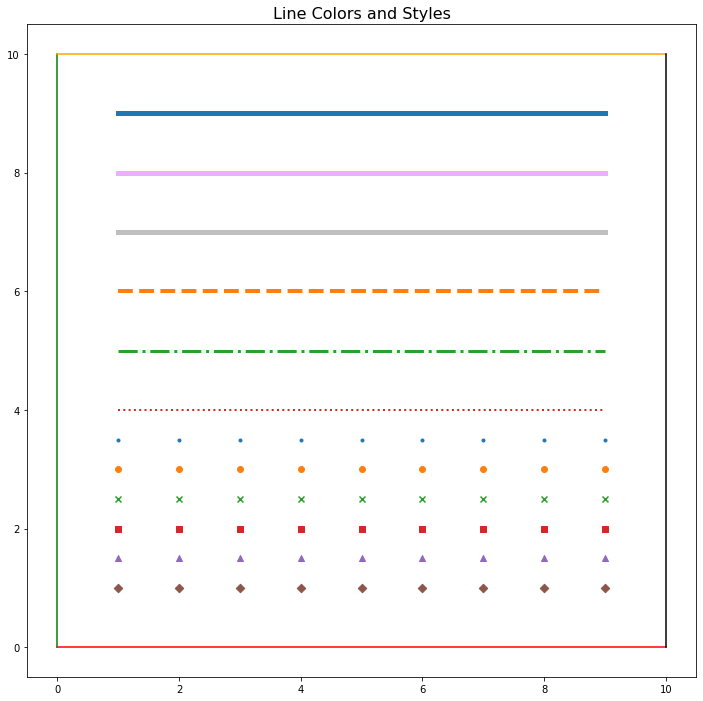

In [160]:
# EXAMPLE: Plotting a square via lines 
plt.figure(figsize=(12, 12))             # the size is (horizontal, vertical)
plt.title("Line Colors and Styles",fontsize=16)
plt.plot([0,10],[0,0],  color='red') # Line connecting (0,0) to (1,0)
plt.plot([0,0],[0,10],  color='green') # Line connecting (0,0) to (0,1)
plt.plot([0,10],[10,10],color='orange') # Line connecting (0,1) to (1,1)
plt.plot([10,10],[0,10],color='black') # Line connecting (1,0) to (1,1)
plt.plot([1,9],[9,9], linewidth=5)    # give a linewidth in points, default is 1.0
plt.plot([1,9],[8,8], linewidth=5,color = '#eaafff')    # for custom color give the RGB value in hex
plt.plot([1,9],[7,7], linewidth=5,color='0.75') # for grey give the percentage of white in quotes
plt.plot([1,9],[6,6], lw=4,linestyle='--') # Linestyles
plt.plot([1,9],[5,5], lw=3,linestyle='-.') # Linestyles
plt.plot([1,9],[4,4], lw=2,linestyle=':') # Linestyles

plt.scatter(range(1,10),[3.5]*9,marker='.')  # various markers, if you don't specify the colors it will cycle
plt.scatter(range(1,10),[3]*9,marker='o')    # through a bunch of colors, starting with blue, orange, green, etc.
plt.scatter(range(1,10),[2.5]*9,marker='x')
plt.scatter(range(1,10),[2]*9,marker='s')
plt.scatter(range(1,10),[1.5]*9,marker='^')
plt.scatter(range(1,10),[1]*9,marker='D')
print()

## Et Cetera

Then you can start getting obsessive, adding gridlines, changing the background color, adding legends, text, and so on. 

Another nice feature of matplotlib is that you can insert simple Latex commands into titles and text.....

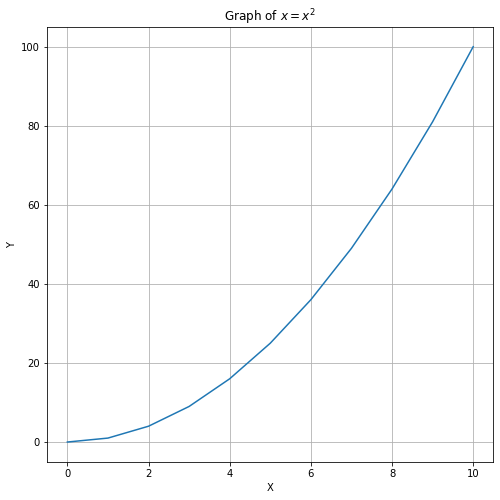

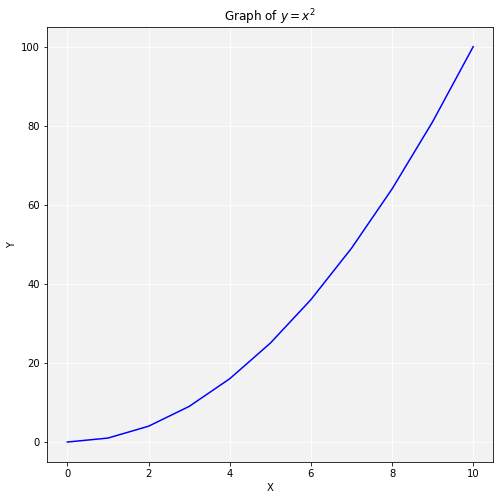

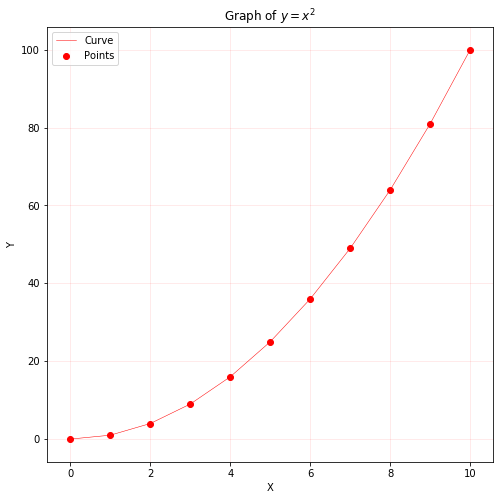

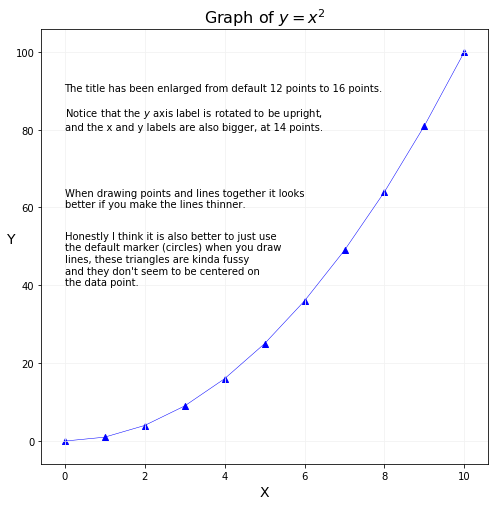

In [161]:
# Plotting a smooth curve for the function x^2
x = [i for i in range(11)]
y = [i**2 for i in x]


plt.figure(figsize=(8, 8))
plt.title('Graph of $x = x^2$')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.plot(x,y)
plt.show()


plt.figure(figsize=(8, 8))
plt.title('Graph of $y = x^2$')
plt.grid(color='w')                # grid of white lines -- don't use points with this, they look funny
plt.gca().set_facecolor('0.95')    # background of light grey
plt.plot(x,y,color='b')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


plt.figure(figsize=(8, 8))
plt.title('Graph of $y = x^2$')
plt.grid(color='r',alpha=0.1)       # alpha sets the transparency, 0 = invisible and 1 = normal           
plt.plot(x,y,color='r',lw=0.5,label='Curve')
plt.scatter(x,y,color='r',marker='o',label='Points')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


plt.figure(figsize=(8, 8))
plt.title('Graph of $y = x^2$',fontsize=16)
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",rotation=0,fontsize=14)
plt.grid(color='0.95')
plt.text(0,90,"The title has been enlarged from default 12 points to 16 points.")
plt.text(0,80,"Notice that the $y$ axis label is rotated to be upright, \nand the x and y labels are also bigger, at 14 points.")   # lower left corner of text string is at point (0,60)
plt.text(0,60,"When drawing points and lines together it looks \nbetter if you make the lines thinner.")
plt.text(0,40,"Honestly I think it is also better to just use\nthe default marker (circles) when you draw \nlines, these triangles are kinda fussy\nand they don't seem to be centered on \nthe data point.")
plt.plot(x,y,color='b',lw=0.5)
plt.scatter(x,y,color='b',marker='^')
plt.show()